In [46]:
import matplotlib.pyplot as plt
from loader import load_excel
from sklearn.model_selection import train_test_split

In [47]:
file = "data\\Abstracts.xlsx"
target = "AverageScore"
columns = ["Title", "Body", "Scores", target]

In [48]:
df = load_excel(file, columns)
df.head()

D:\Work\ML_Abstracts\.venv\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Title,Body,Scores,AverageScore
0,CUTANEOUS MALAKOPLAKIA. A CASE WITH THREE DIFF...,A 16 year old girl with unremarkable medical h...,6,6.0
1,DISSEMINATED ECTHYMA GANGRENOSUM IN INFANTS AN...,PURPOSE OF THE STUDY\nTo demonstrate the clini...,4,4.0
2,HAND NEUROPATHY: A CORRELATION OF CLINICAL AND...,RESEARCH QUESTION: Can the Semmes-Weinstein (S...,5,5.0
3,PAPULONECROTIC TUBERCULIDS: SERIES OF 18 PATIE...,Background:Tuberculids are a heterogenous grou...,5,5.0
4,CUTANEOUS MULTI-DRUG RESISTANT TUBERCULOSIS IN...,Background: Multi-drug resistant tuberculosis ...,5,5.0


AverageScore
4.0    1307
5.0     997
6.0     509
3.0     462
2.0     433
7.0      65
1.0      12
0.0       4
Name: count, dtype: int64


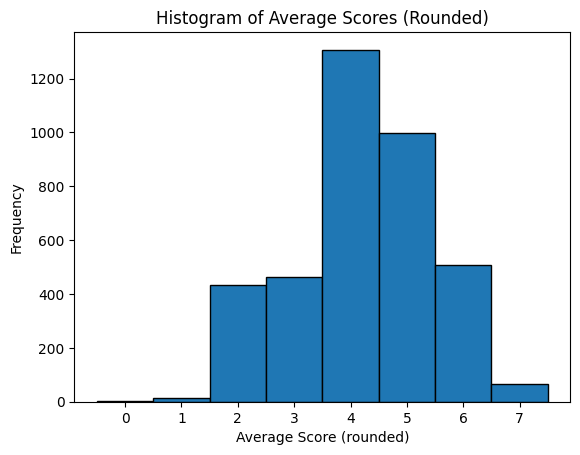

In [49]:
rounded_scores = df['AverageScore'].round()
hist = rounded_scores.value_counts()
print(hist)

bins = [i - 0.5 for i in range(0, 9)]
plt.hist(rounded_scores, bins=bins, edgecolor='black')
plt.xticks(range(0, 8))  # show tick marks 0–7
plt.xlabel("Average Score (rounded)")
plt.ylabel("Frequency")
plt.title("Histogram of Average Scores (Rounded)")
plt.show()

In [50]:
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [51]:
from AbstractDataset import AbstractDataset
# from embeddings import  get_bert_model, get_bert_embeddings
# bert_model = get_bert_model()
train_dataset = AbstractDataset(X_train['Body'].values, y_train)
test_dataset = AbstractDataset(X_test['Body'].values, y_test)


embedding_dim = bert_model.config.hidden_size
model = TextRegressor(embedding_dim).to(device)